<a href="https://colab.research.google.com/github/Asritha0606/GenerativeAI/blob/main/GenAI_PromptEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Engineering

1. A single query/instruction is known as Prompt.

2. Curating your prompt for your specific use case is referred to as Prompt engineering.

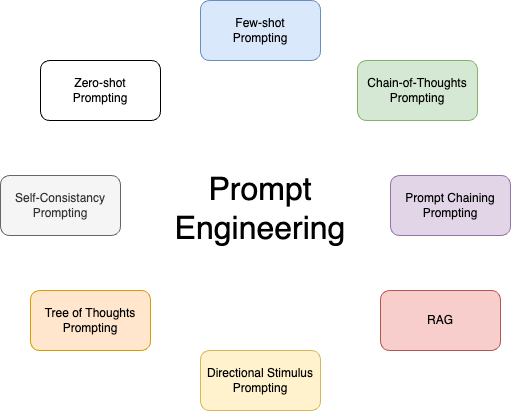

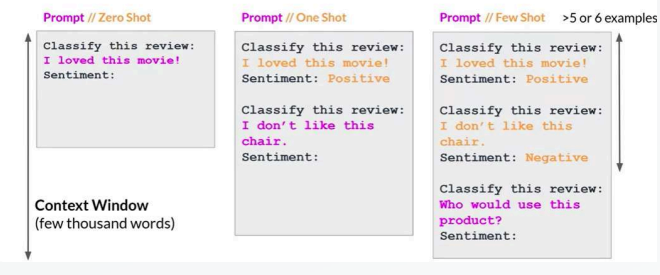

# Groq

https://console.groq.com/docs/overview

In [ ]:
!pip install -q groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 4.2 MB/s eta 0:00:00


Importing keys

In [ ]:
import os
from google.colab import userdata
groq_api_key = userdata.get('groq_api')
os.environ["GROQ_API_KEY"] = groq_api_key

In [ ]:
import os
from groq import Groq
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of large language models",
        }
    ],
    model="llama3-8b-8192",
)
print(chat_completion.choices[0].message.content)

Large Language Models (LLMs) have revolutionized the field of Natural Language Processing (NLP) and have numerous applications in various industries. The importance of LLMs can be understood from the following aspects:

1. **Improved Language Understanding**: LLMs are trained on vast amounts of text data, allowing them to learn complex patterns, relationships, and nuances of human language. This enables them to better comprehend and interpret language, leading to improved performance in tasks such as sentiment analysis, Named Entity Recognition (NER), and question answering.
2. **Enhanced Conversational AI**: LLMs can engage in more natural and human-like conversations, enabling chatbots, voice assistants, and other conversational AI systems to better understand and respond to user inputs. This improves customer service, reduces user frustration, and enhances overall user experience.
3. **Advancements in Text Generation**: LLMs can generate high-quality text, including articles, blog p

Setting up the LLM

In [ ]:
import os
from groq import Groq
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of large language models",
        }
    ],
    model="llama3-8b-8192",
)
print(chat_completion.choices[0].message.content)

Large language models (LLMs) have revolutionized the field of natural language processing (NLP) and have numerous practical applications. Here are some of the key importance of LLMs:

1. **Improved Language Understanding**: LLMs are capable of understanding language in a way that is closer to human comprehension, allowing them to accurately identify nuances, subtleties, and context-dependent meanings. This has significant implications for applications such as text classification, sentiment analysis, and machine translation.
2. **Enhanced Conversational AI**: LLMs enable the development of more sophisticated conversational AI systems that can engage in natural-sounding dialogue, respond to complex queries, and even exhibit creativity and humor.
3. **Text Generation and Summarization**: LLMs can generate human-like text, including articles, product descriptions, and even entire books. They can also summarize long documents, making it easier to retrieve key information.
4. **Sentiment Ana

# Langchain-Groq

https://python.langchain.com/docs/integrations/providers/

In [ ]:
!pip install -q langchain_groq

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(temperature=0, model_name="llama3-70b-8192")

In [ ]:
print(llm.invoke("hi"))

content="Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.08057276, 'prompt_time': 0.004379599, 'queue_time': 0.5913713580000001, 'total_time': 0.084952359}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None} id='run--5f3234fc-2457-4014-8cbd-4f5372afa0fe-0' usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37}


# LiteLLM

https://www.litellm.ai/

In [ ]:
!pip install -q litellm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 69.9 MB/s eta 0:00:00


In [ ]:
from litellm import completion

##Prompting Principles:

**Principle 1**: Write clear and specific instructions




# Tactics

**Tactic 1**: Use delimiters to clearly indicate distinct parts of the input

Delimiters can be anything like: ```, """, < >, <tag> </tag>, :

In [ ]:
text = """
You should express what you want a model to do by \
providing instructions that are as clear and \
specific as you can possibly make them. \
This will guide the model towards the desired output, \
and reduce the chances of receiving irrelevant \
or incorrect responses. Don't confuse writing a \
clear prompt with writing a short prompt. \
In many cases, longer prompts provide more clarity \
and context for the model, which can lead to \
more detailed and relevant outputs.
"""

prompt = f"""Sumarise my text: {text}""" #format strings

In [ ]:
print(prompt)

Sumarise my text: 
You should express what you want a model to do by providing instructions that are as clear and specific as you can possibly make them. This will guide the model towards the desired output, and reduce the chances of receiving irrelevant or incorrect responses. Don't confuse writing a clear prompt with writing a short prompt. In many cases, longer prompts provide more clarity and context for the model, which can lead to more detailed and relevant outputs.



In [ ]:
def get_response(prompt):
  #define model
  model="groq/llama3-70b-8192"
  messages = [{"role": "user", "content": prompt}]

  #call responses
  response = completion(
      model=model,
      messages=messages
  )

  return response['choices'][0]['message']['content'] or ""


In [ ]:
res = get_response(prompt)
print(res)

Here is a summary of your text:

To get the desired output from a model, provide clear and specific instructions. This reduces the chances of getting irrelevant or incorrect answers. Longer prompts can provide more clarity and context, leading to more detailed and relevant outputs.


**Tactic 2** : Ask for a Structured output

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along \
with their authors and genres.
Provide them in JSON format with the following keys:
book_id, title, author, genre.
"""
response = get_response(prompt)
print(response)

Here are three made-up book titles along with their authors and genres in JSON format:

```
[
  {
    "book_id": 1,
    "title": "The Whispering Shadows",
    "author": "Evelyn Wystan",
    "genre": "Fantasy"
  },
  {
    "book_id": 2,
    "title": "The Lost City of Eldarath",
    "author": "Caleb R. Wynter",
    "genre": "Science Fiction"
  },
  {
    "book_id": 3,
    "title": "The Silent Heart of Winter",
    "author": "Lila Asteria",
    "": "Historical Fiction"
  }
]
```

Let me know if you'd like me to generate more!


**Tactic 3**: Ask the model to check whether conditions are satisfied

In [ ]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \
water boiling. While that's happening, \
grab a cup and put a tea bag in it. Once the water is \
hot enough, just pour it over the tea bag. \
Let it sit for a bit so the tea can steep. After a \
few minutes, take out the tea bag. If you \
like, you can add some sugar or milk to taste. \
And that's it! You've got yourself a delicious \
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, \
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_response(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Here are the steps:

Step 1 - Get some water boiling.
Step 2 - Grab a cup and put it in the cup.
Step 3 - Pour the boiling water over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - Take out the tea bag.
Step 6 - Add sugar or milk to taste, if desired.
Step 7 - Enjoy your delicious cup of tea!


**Tactic 4**: "One-shot" prompting



In [ ]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \
valley flows from a modest spring; the \
grandest symphony originates from a single note; \
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_response(prompt)
print(response)

<grandparent>: The strongest tree is not the one that is never shaken, but the one that bends and flexes in the storm; the brightest star is not the one that is never dimmed, but the one that shines on despite the darkness; the purest gold is not the one that is never tested, but the one that is refined in the fire.


**Tactic 5**: Chain of Thought Prompting

In [ ]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total.
- Then compare your solution to the student's solution \
and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:

Let's do this task step by step.
"""
response = get_response(prompt)
print(response)

Here's the solution:

Question:
```
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:

Let's break down the costs:

1. Land cost: $100/sq ft, so total land cost = $100x
2. Solar panel cost: $250/sq ft, so total solar panel cost = $250x
3. Maintenance cost: flat fee of $100,000 per year, plus an additional $10/sq ft, so total maintenance cost = $100,000 + $10x

Now, let's add up the costs:

Total cost = Land cost + 

**Tactic 6**: Zero Shot Chain Of Thought

In [ ]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. How many apples did I remain with?

Let's think step by step."""

response = get_response(prompt)
print(response)

Let's break it down step by step.

Initially, I had 10 apples.

I gave 2 apples to the neighbor, so I had 10 - 2 = 8 apples left.

Then, I gave 2 apples to the repairman, so I had 8 - 2 = 6 apples left.

Next, I bought 5 more, so I now had 6 + 5 = 11 apples.

I ate 1 apple, so I had 11 - 1 = 10 apples left.

So, I remain with 10 apples.


**Tactic 7**: Few Shot Prompting

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
A:
"""

response = get_response(prompt)
print(response)

Let's identify the odd numbers in the group:

15, 32, 5, 13, 82, 7, 1

The odd numbers are: 15, 5, 13, 7, 1

Let's add them up: 15 + 5 + 13 + 7 + 1 = 41

Since 41 is an odd number, the answer is:

A: The answer is False.


# Examples:

**Question answering**

point 3 is a guardrail so that our LLM does not hallucinate.

In [ ]:
prompt = """Follow the rules to answer the question:
1. Answer the question based on the context below.
2. Keep the answer short and concise.
3. Respond "Unsure about answer" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical.
There, scientists generated an early version of the antibody, dubbed OKT3. Originally sourced from mice,
the molecule was able to bind to the surface of T cells and limit their cell-killing potential.
In 1986, it was approved to help prevent organ rejection after kidney transplants, making it the first
therapeutic antibody allowed for human use.

Question: What was OKT3 full form?

Answer:"""

response = get_response(prompt)
print(response)

Unsure about answer


**Role Playing: Chatbot**

Introduced the concept of Persona


In [ ]:
prompt = """The following is a conversation with an AI research assistant.
The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greeting! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""

response = get_response(prompt)
print(response)

The creation of black holes is a fascinating topic in astrophysics. Black holes are regions in space where the gravitational pull is so strong that nothing, including light, can escape. The formation of black hole occurs when a massive star collapses in on itself and its gravity becomes so strong that it warps the fabric of spacetime.

There are four types of black holes, each with different properties and formation mechanisms. The most common type is the stellar-mass black hole, which forms from the collapse of a single massive star. These black holes have masses similar to that of the sun.

Supermassive black holes, on the other hand, are found at the centers of galaxies and have masses millions or even billions of times that of the sun. The formation of these supermassive black holes is not yet fully understood, but it is believed to involve the merger of smaller black holes.

Primordial black holes are hypothetical and are thought to have formed in the early universe before the fir

**SQL Code generation**

In [ ]:
prompt = "\"\"\"\nTable departments, columns = [DepartmentId, DepartmentName]\nTable students, columns = [DepartmentId, StudentId, StudentName]\nCreate a MySQL query for all students in the Computer Science Department\n\"\"\""
response = get_response(prompt)
print(response)

Here is the query:
```
SELECT s.StudentId, s.StudentName 
FROM students s
JOIN departments d ON s.DepartmentId = d.DepartmentId
WHERE d.DepartmentName = 'Computer Science';
```
Here's an explanation:

1. We join the `students` table with the `departments` table on the `DepartmentId` column.
2. We filter the results to only include students from the `Computer Science` department by specifying the `DepartmentName` column in the `WHERE` clause.

Note: I assume that the department` table has a `DepartmentName` column with the value `Computer Science` for the Computer Science department.


**Guide the model**

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even."""

response = get_response(prompt)
print(response)

Let's break the problem into steps:

**Step 1. Identify the odd numbers:**
The odd numbers in the group are: 15, 5, 13, 7, 1

**Step 2. Add the odd numbers:**
Let's add the odd numbers:
15 + 5 = 20
20 + 13 = 33
33 + 7 = 40
40 + 1 = 41

**Step 3. Indicate whether the result is odd or even:**
The result is: 41
Since 41 is an odd number, the odd numbers in this group do not add up to an even number.


**Topic Modelling**

In [ ]:
story = """
In a recent survey conducted by the government,
public sector employees were asked to rate their level
of satisfaction with the department they work at.
The results revealed that NASA was the most popular
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings,
stating, "I'm not surprised that NASA came out on top.
It's a great place to work with amazing people and
incredible opportunities. I'm proud to be a part of
such an innovative organization."

The results were also welcomed by NASA's management team,
with Director Tom Johnson stating, "We are thrilled to
hear that our employees are satisfied with their work at NASA.
We have a talented and dedicated team who work tirelessly
to achieve our goals, and it's fantastic to see that their
hard work is paying off."

The survey also revealed that the
Social Security Administration had the lowest satisfaction
rating, with only 45% of employees indicating they were
satisfied with their job. The government has pledged to
address the concerns raised by employees in the survey and
work towards improving job satisfaction across all departments.
"""

In [ ]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long.

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_response(prompt)
print(response)

Here are the five topics being discussed in the text, formatted as a list of items separated by commas:

Job Satisfaction, NASA, Government, Survey Results, Employee Opinions


In [ ]:
response.split(sep=',')

['Here are the five topics being discussed in the text',
 ' formatted as a list of items separated by commas:\n\nJob Satisfaction',
 ' NASA',
 ' Government',
 ' Survey Results',
 ' Employee Opinions']

**Reasoning**

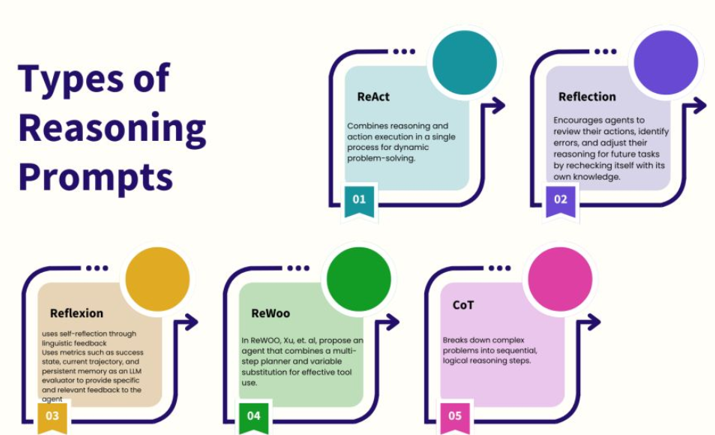

1. ReAct (Reasoning + Action)
2. Reflection (Review and refine reasoning)
3. Reflexion (Self-reflection using feedback)
4. ReWOO (Multi-step planner with variable substitution)
5. CoT (Chain of Thought)

Let’s discuss each reasoning type:

**1. ReAct (Reason + Act)**
Combines reasoning and action execution in a single process for dynamic problem-solving. React prompting is a cycle of thought, action and observation.

Prompt:
“””You are a helpful assistant that can perform a wide range of tasks, including answering questions, summarizing information, and performing various types of analyses. Proceed in a cycle of Thought, Action and Observation to arrive at the final answer. Enlist the reasoning process behind your answer”””
 ***

**2. Reflection (Self-Correction & Improvement)**
Breaks down complex problems into sequential, logical reasoning steps.

Prompt: “””You are a helpful assistant that can perform a wide range of tasks, including answering questions, summarizing information, and performing various types of analyses. You are capable of performing complex reasoning and reflection. Review your answer and check for any missing points or mistakes. If you find any, correct your answer.”””
 ***

**3. Reflexion (Linguistic Feedback & Memory-Based Review)**
Uses self-reflection through linguistic feedback. Uses metrics such as success state, current trajectory, and persistent memory as an LLM evaluator to provide specific and relevant feedback to the agent

Prompt: """You are an AI assistant optimizing responses. Given your last answer, assess its correctness and clarity. Use success metrics (accuracy, coherence, and relevance) and refine your response if needed."""
 ***

**4. ReWOO (Multi-Step Planning & Variable Substitution)**
ReWOO stands for Reasoning WithOut Observation. ReWOO has three modules: Planner, Worker, and Solver. It improves efficiency by generating the entire toolchain in a single pass, reducing token consumption and execution time.

Planner prompt: """For the following task, make plans that can solve the problem step by step.”””
Worker :The worker receives the plan and executes the required tools in sequence.
Solver prompt: """Solve the following task or problem. To solve the problem, follow the step-by-step Plan"""
 ***

**5. CoT (Chain of Thought Reasoning) -**
Breaks down complex problems into sequential, logical reasoning steps.

Prompt:
"""Answer the following question as best as you can. You must think step by step to answer the question."""
 ***

**Any Limitations?**

**Hallucinations**

Trying to make up an answer without any facts.
Wrong answer

In [ ]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_response(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie! Let me tell you more about this innovative oral care device.

**Key Features:**

1. **Slim Design**: The UltraSlim toothbrush is designed to fit comfortably in your mouth, making it easy to maneuver around teeth and reach those hard-to-reach areas.
2. **Aerodynamic Bristles**: Boie's proprietary AeroGlide technology uses whisper-quiet, ultra-fine bristles that gently remove plaque, food particles, and bacteria, promoting healthy gums and teeth.
3. **Smart Technology**: The toothbrush features a built-in accelerometer and gyroscope, which track your brushing habits, providing real-time feedback and personalized coaching to improve your oral care routine.
4. **Customizable Settings**: Choose from various brushing modes, or Whitening mode, and adjust the intensity to suit your oral health needs.
5. **Long-Lasting Battery**: Enjoy up to 2 weeks of battery life on a single charge, making it perfect for travel.
6. **Water-Resistant**: Designe

## Prompting the LLM to reason

**React Prompt**:

- Its a cycle of thought -> action -> observation

In [ ]:
query = "Explain the process of photosynthesis"
prompt = f"""
Answer the following question as best you can.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take
Action Input: the input to the action
Observation: the result of the action
... (this process can repeat multiple times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!
Question: {query}
"""
response = get_response(prompt)
print(response)

Let's go through the process of explaining photosynthesis.

Question: Explain the process of photosynthesis

Thought: I need to break down the process into smaller steps to understand it properly.

Action: Research the overall process of photosynthesis

Observation: Photosynthesis is the process by which plants, algae, and some bacteria convert light energy from the sun into chemical energy in the form of organic compounds.

Thought: I need to understand the reactants and products of photosynthesis.

Action: Research the reactants and products of photosynthesis

Action Input: Light, water, carbon dioxide, chlorophyll

Observation: The reactants are light, water (H2O), carbon dioxide (CO2), and chlorophyll (a green pigment). The products are glucose (C6H12O6)), oxygen (O2), and water (H2O).

Thought: I need to understand the light-dependent reactions.

Action: Research the light-dependent reactions

Action Input: Light, water, chlorophyll

Observation: The light-dependent reactions occu

**Reflection Prompt**:

- Prompt the LLM to rethink or critique its own response to imrpove it.

In [ ]:
query = "Explain the process of photosynthesis"
prompt_1 = f"""
Answer the following question as best you can.
Question: {query}
"""
output = get_response(prompt)
print(output)



Here's my attempt to answer the question using the provided format:

Question: Explain the process of photosynthesis
Thought: I need to understand the overall equation and the key components involved
Action: Research the basic equation of photosynthesis
Action Input: Search online for "photosynthesis equation"
Observation: The basic equation is: 6 CO2 + 6 H2O + light energy → C6H12O6 (glucose) + 6 O2

Thought: I have the overall equation, now I need to understand the light-dependent reactions
Action: Research the light-dependent reactions of photosynthesis
Action Input: Search online for "light-dependent reactions photosynthesis"
Observation: The light-dependent reactions occur in the thylakoid membranes of the chloroplast and involve the conversion of light energy into ATP and NADPH
Action: Research the electron transport chain in photosynthesis
Action Input: Search online for "electron transport chain photosynthesis"
Observation: The electron transport chain generates a proton gradie

In [ ]:
prompt_2 = f"""
Reflect and provide critique on the following writing- {output}
"""
response = get_response(prompt)
print(response)

Here's my response:

Question: Explain the process of photosynthesis

Thought: Let me break down the overall process into smaller steps.

Action: Research the light-dependent reactions
Action Input: Review scientific literature and diagrams

Observation: The light-dependent reactions involve the conversion of light energy into ATP and NADPH.

Action: Research the light-independent reactions (Calvin Cycle)
Action Input: Scientific literature and diagrams

Observation: The light-independent reactions involve the fixation of carbon dioxide into glucose using the energy from ATP and NADPH.

Action: Identify the reactants and products of photosynthesis
Action Input: Review chemical equations

Observation: The reactants are carbon dioxide, water, and light energy, while the products are glucose and oxygen.

Thought: I now have a good understanding of the process, let me summarize it.

Action: Write a concise summary of photosynthesis
Action Input: Combine observations from previous steps

Th

#Assignments:

##Develop Prompt engineering solutions based on 'Real world use cases':

**Beginner - Summary Extraction**

Write the summary of the text below-

Black..... holes—those mysterious cosmic phenomena—are regions in space with gravitational forces so intense that not even light can escape. Astrophysicists Dr. Alan Rothwell and Prof. Priya Sinha### have dived deeply into the “science” $$$$ of these objects, uncovering fascinating insights! According to Rothwell’s research (2021), black holes form when massive stars burn ^^^^through their fuel & collapse under gravity until they reach a singularity—a point of (nearly) infinite density, where physics bReak dOwn.

Sinha’s studies focus on the event horizon, or the “point of no return”; any matter or light crossing this boundary is trapped forever. Sinha also examines Hawking Radiation—a theoretical ....concept from Stephen Hawking—suggesting that black holes.... emit small amounts of energy...., slowly losing mass. Such radiation might allow scientists to peek inside these intense entities!!!!. Together, Rothwell and Sinha’s studies hint at bridging quantum mechanics w/ general relativity—fields otherwise tough to reconcile!

Remember to clean the text.

****************











**Intermediate - Sentiment Analysis**

Given a review, design a prompt to perform sentiment analysis and return the sentiment of the writer as Positive, Negative or Neutral.

Example-
"I absolutely loved the new update—it’s so user-friendly and fast!"
Output- Positive

**Advanced - Intelligent Resume Filtering using Keyword Extraction**

A hiring manager is seeking assistance in filtering potential candidates from thousands of resumes stored in a MongoDB collection. Your task is to help by extracting meaningful keywords from the manager's natural language query, based on predefined filters.

Task:
Given a query from the hiring manager and a list of filters:
Filters = ["work_experience", "technical_skills", "designation", "education","location"]

You must:

1. Extract relevant keywords from the query, mapped to the appropriate filters.

2. Construct and return a valid MongoDB query (in PyMongo format) that can be directly executed on the resumes collection to retrieve matching candidates.

Example-

Hiring Manager Query Samples

- "Get me candidates with 2 years experience in python and flask and ready to work in Banglore"
- skills : python
- candidate name Akash agarwal

Output:
{
"work_experience": {"$eq":2},
"technicak_skills":{"$in": ["Python", "flask"]},
"location":{"Banglore"}
}

Remember to add guardrails.